# Example 1

## Overview

This notebook reviews

- some of the aspects of the central limit theorem,
- confidence intervals,
- and hypothesis testing.

As usual we will start by importing some useful libraries. Recall from the
[previous
notebook](https://github.com/aezarebski/aas-extended-examples/tree/main/example-0)
that it is good practise to import these packages with the standard
abbreviations of their names.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Probability Review

This section is a brief review of probability as a way to work towards the central limit theorem.

### Expected Value

For a real-valued random variable, the expected value is the average of the possible outcomes weighted by the respective probabilites of occuring.

### Question

Define a random variable X as follows: roll a fair six-sided die until a six is rolled, then record the total number of rolls required. What is the expected value of X?

We have answered this question mathematically below. Simulate this procedure and show the result with a chart to verify the math is correct.

### Mathematical Answer

The expected value is given by the summation over all possible values of X multiplied by their probabilites:

$\mathbb{E}(X) = \sum_{i=1}^{\infty}i*P(X=i)$

For a fair die, the probability $P(X=i) = \frac{5}{6}^{i-1}*\frac{1}{6}$

The summation is then:

$\mathbb{E}(X) = \sum_{i=1}^{\infty}i*\frac{5}{6}^{i-1}*\frac{1}{6} = 1*\frac{5}{6}^{0}*\frac{1}{6} + 2*\frac{5}{6}^{1}*\frac{1}{6} + 3*\frac{5}{6}^{2}*\frac{1}{6} ... $

Recall that a geometric series is a series such that each term of the summation is equal to the previous term times some ratio $r$,

$a + ar + ar^2 + ar^3...$

and the sum of an infinite geometric series is $\frac{a}{1-r}$.

We can observe that this is a sum of several geometric series with $r=\frac{5}{6}$:

$\frac{5}{6}^{0}*\frac{1}{6} + 2*\frac{5}{6}^{1}*\frac{1}{6} + 3*\frac{5}{6}^{2}*\frac{1}{6}... = $

$\frac{5}{6}^{0}*\frac{1}{6} + \quad  \frac{5}{6}^{1}*\frac{1}{6}  + \quad \frac{5}{6}^{2}*\frac{1}{6}...$

$\qquad \quad + \quad  \frac{5}{6}^{1}*\frac{1}{6} + \quad \frac{5}{6}^{2}*\frac{1}{6}...$

$\qquad \quad + \qquad  \qquad + \quad \frac{5}{6}^{2}*\frac{1}{6}...$

The sum of each series is $\frac{a}{1-r}$ where $a$ is the first term, so this is equivalent to:

$\frac{\frac{1}{6}}{1-\frac{5}{6}} + \frac{\frac{5}{36}}{1-\frac{5}{6}} + \frac{\frac{25}{216}}{1-\frac{5}{6}}...$

$ = 1 + \frac{5}{6} + \frac{25}{36}...$

Which is itself a geometric series:

$\sum_{i=1}^{\infty}\frac{5}{6}^i = \frac{1}{1-\frac{5}{6}} = 6$

Therefore, $\mathbb{E}(X) = 6$


**NOTE:** As a shortcut, you could have noticed that this is one of the definitions of a geometric random variable and looked up the mean to find that it is $\frac{1}{p}$




### Monte Carlo Approach

## Central limit theorem

The central limit theorem (CLT) tells us about the distribution of the sample
mean as the number of observations grows. A lot of results in statistics rely on
the CLT, so it is worth getting familiar with the details. There are some
conditions that need to be satisfied for the CLT to hold, for example, we will
usually want to know that the samples are independent and identically
distributed (IID) and that they are drawn from a distribution with a finite
variance.

## CLT: Motivating example

### Question

Write the following functions:

1. A function called `rand_exp_mean` which takes a number, `n`, and a rate,
   `lam` and returns the sample average of `n` exponentially distributed (with
   rate `lam`) random variables. Note this should return a different value each
   time you call it.
2. A function called `rand_sample_means` which takes a number, `n` and a rate,
   `lam` and returns an array with 1000 evaluations of the function call
   `rand_exp_mean(n, lam)`. Note that a list comprehension may help here.

### Answer

In [2]:
def rand_exp_mean(n, lam):
    return stats.expon.rvs(scale = 1/lam, size = n).mean()

def rand_sample_means(n, lam):
    return np.array([rand_exp_mean(n, lam) for _ in range(1000)])

### Question

Make a histogram of the values from `rand_sample_means` in the question above
with `lam=0.2` and `n=5`. Plot the probability density function of a normal
distribution with mean $5$ and standard deviation $5 / \sqrt{5}$. Repeat whis
process with `n=100` and with a normal distribution with standard distribution
$5 / \sqrt{100}$. What do you notice?

### Answer

First the plot with `n=5`

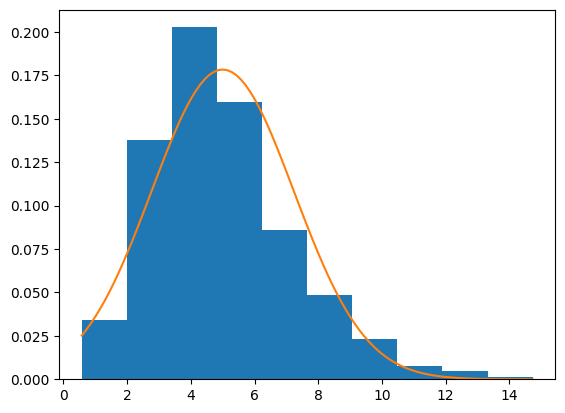

In [3]:
n = 5
rand_sms = rand_sample_means(n, 0.2)
clt_xs = np.linspace(rand_sms.min(), rand_sms.max(), num=100)
clt_ys = stats.norm.pdf(clt_xs, loc=5, scale=5/np.sqrt(n))

plt.figure()
plt.hist(rand_sms, density=True)
plt.plot(clt_xs, clt_ys)
plt.show()

Then the plot with `n=100`

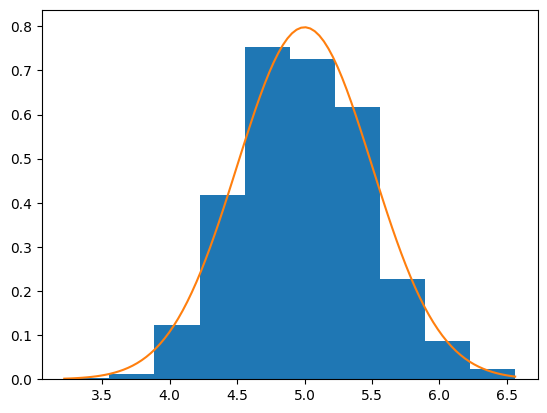

In [4]:
n = 100
rand_sms = rand_sample_means(n, 0.2)
clt_xs = np.linspace(rand_sms.min(), rand_sms.max(), num=100)
clt_ys = stats.norm.pdf(clt_xs, loc=5, scale=5/np.sqrt(n))

plt.figure()
plt.hist(rand_sms, density=True)
plt.plot(clt_xs, clt_ys)
plt.show()

## CLT: Theory

### Question

Write down a statement of the law of large numbers (LLN). Write down a
statement of the central limit theorem. Make sure you understand what
each of them tells you.

### Answer

-   $\hat{X}$ converges to $\mu$.
-   $\sqrt{n}(\hat{X} - \mu) / \sigma$ converges in distribution to the
    standard normal distribution as the sample size increases.
-   The LLN tells you what the limiting value is, the CLT tells you
    about the fluctuations in the estimate.

Example: CLT
------------

To see that the distribution of the sample mean converges to a normal
distribution we will do a simulation study.

### Question

Write down the distribution of the sample mean given an IID sample of
exponential random variables with rate $1/5$.

### Answer

-   The mean of the exponential distribution is 5.
-   The standard deviation of the exponential distribution is 5
-   The CLT tells us the limiting distribution for the sample mean is
    $N\left(5,\frac{5^2}{n}\right)$

## Estimating the mean of a small sample

If we have a sample from a normal distribution with sample mean $\bar{x}$ and
known the standard deviation, $\sigma$, the $(1-\alpha)100\%$ CI for the
estimate of the mean is

$$
\bar{x} \pm z_{\alpha / 2} \frac{\sigma}{\sqrt{n}}
$$

where $z_{\alpha / 2}$ comes from the inverse CDF.

### Question

Simulate a set of 5 draws from a $N(1,1)$ distribution and, assuming the
standard deviation is known, check if the $95\%$ CI contains the true mean.

### Answer

In [5]:
def f1():
    n = 5
    x_bar = stats.norm.rvs(loc = 1.0, scale = 1.0, size = n).mean()
    # Percent Point Function (Inverse of CDF).
    z_a2 = stats.norm.ppf(0.975)
    lower_lim = x_bar - z_a2 * 1.0 / np.sqrt(n)
    upper_lim = x_bar + z_a2 * 1.0 / np.sqrt(n)
    return lower_lim <= 1 and 1 <= upper_lim

print(f1())

True


### Question

Now repeat this process 1000 times and check how many times it contains the true
mean. Do you think the coverage of the CI will be correct?

### Answer

Because we have used the correct standard deviation this should get the coverage correct.

In [6]:
good_ci_count = 0
for _ in range(1000):
    if f1():
        good_ci_count += 1
print(good_ci_count / 1000)

0.947


### Question

Now repeat this 1000-fold repetition using the sample standard deviation instead of the true standard deviation but treat it as though it is known, ie continue with $z_{\alpha / 2}$. Do you think the coverage of the CI will be correct?

### Answer

Because we have not accounted for the additional uncertainty our CI will be too small and the coverage of the CI will not be as high as desired.

In [7]:
def f2():
    n = 5
    random_sample = stats.norm.rvs(loc = 1.0, scale = 1.0, size = n)
    x_bar = random_sample.mean()
    s = np.sqrt(np.sum((random_sample - x_bar)**2) / (n-1))
    z_a2 = stats.norm.ppf(0.975)
    lower_lim = x_bar - z_a2 * s / np.sqrt(n)
    upper_lim = x_bar + z_a2 * s / np.sqrt(n)
    return lower_lim <= 1 and 1 <= upper_lim

good_ci_count = 0
for _ in range(1000):
    if f2():
        good_ci_count += 1
print(good_ci_count / 1000)

0.888


### Question

Now repeat this process while accounting for the uncertainty in the standard deviation, ie use the $t_{\alpha / 2}$. How many degrees of freedom are there in the _t_-distribution? Do you think the coverage of the CI will be correct?

### Answer

We use $n-1 = 4$ degrees of freedom in the _t_-distribution. The coverage should be correct because we are using the correct model.

In [8]:
def f3():
    n = 5
    random_sample = stats.norm.rvs(loc = 1.0, scale = 1.0, size = n)
    x_bar = random_sample.mean()
    s = np.sqrt(np.sum((random_sample - x_bar)**2) / (n-1))
    # here we use the t-distribution to understand the uncertainty.
    df = n - 1
    t_a2 = stats.t.ppf(0.975, df)
    lower_lim = x_bar - t_a2 * s / np.sqrt(n)
    upper_lim = x_bar + t_a2 * s / np.sqrt(n)
    return lower_lim <= 1 and 1 <= upper_lim

good_ci_count = 0
for _ in range(1000):
    if f3():
        good_ci_count += 1
print(good_ci_count / 1000)

0.946


Testing the hypothesis that a coin is fair
------------------------------------------

There is an election to choose between candidate _A_ and candidate _B_. To win the election a candidate needs to get the majority of the votes. Candidate _B_ declared victory but there is suspicion that they cheated. A random sample of $n$ ballots had $m$ votes for _A_. We want to know if we can reject the null hypothesis that _B_ did in fact win.

### Question

Would we reject the null if $n=100$ and $m=70$?

### Answer

The null hypothesis is $H_{0}: p_{B} > 1/2$. We can model the number of votes for _B_ as a binomial random variable with $n=100$ and $p=0.5$ and see how likely it is that _B_ got no more than 30 votes.

The probability that _B_ got no more than 30 votes even if $p=0.5$ is very small. At a significancy level of $0.05$ we could reject the null hypothesis that _B_ did actually win.

In [9]:
stats.binom.cdf(k = 30, n = 100, p = 0.5)

3.925069822796835e-05

### Question

If $n=100$, how small would $m$ need to be for us to not be able to reject the null using this test?

### Answer

If there were at least 42 votes for _B_, this test would not reject the null.

In [10]:
print(stats.binom.ppf(0.05, n = 100, p = 0.5))
print(stats.binom.cdf(k = 41, n = 100, p = 0.5))
print(stats.binom.cdf(k = 42, n = 100, p = 0.5))

42.0
0.044313040057033834
0.06660530960360693


Parameter estimation of the binomial distribution
-------------------------------------------------

We want to make an *estimate* the probability that a coin comes up
heads. We also want to understand the level of confidence we have in
this estimate; we use a *confidence interval* (CI) to describe the range
of values we are confident the \"true\" probability of heads lies
within.

Binomial random variables can be used to model the number of times a
coin comes up heads when flipped $n$ times. Let $X$ be a binomial random
variable (RV) representing the number of heads that are observed when a
coin is flipped $n$ times and the probability of coming up heads is $p$.
We assume that $n$ is known but $p$ is unknown.

The expected value of $X$, ie the average number of times that the coin
comes up heads, is $np$. So a simple way to estimate $p$ is to divide
the number of heads, $X$, by the number of flips, $n$. This gives the
estimate

$$
\hat{p} = X / n.
$$

This estimator is called the [the method of
moments](https://en.wikipedia.org/wiki/Method_of_moments_(statistics)). This is
also an example of a maximum likelihood estimate (MLE).

Given an estimator, such as $\hat{p}$, we usually want to quantify the
uncertainty. One way to construct a CI is to approximate the sampling
distribution by a normal distribution. It is a bit crude, but it is acceptable
when we have lots of data. The estimated standard error of $\hat{p}$ is
$\sqrt{\hat{p}(1-\hat{p})/n}$, so the CI is given by

$$
\hat{p} \pm z \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

where $z$ is the appropriate quantile of the standard normal distribution. In
the case of a $95\%$ distribution this value is $1.96$.

### Question

State the limitations on the estimator we are using for the CI.

### Answer

The estimate assumes you have enough data to justify an asymptotic
solution so is unlikely to be accurate for small datasets.

### Question

Implement a function called `estimate_and_ci` which takes two
arguments: `num_trials` which is $n$ in the description above, and
`num_success` which is $X$ above. The function should return
`(p_hat,(ci_lower,ci_upper))` where `p_hat` is $\hat{p}$ and
`ci_x` are the limits of the $95\%$ CI.

### Answer

In [11]:
def estimate_and_ci(num_trials, num_success):
    p_hat = num_success / num_trials
    z = 1.96
    delta = z * np.sqrt(p_hat * (1 - p_hat) / num_trials)
    return (p_hat,(p_hat - delta, p_hat + delta))

### Question

Simulate a binomial random variable with $n=100$ and $p=0.6$. Then use
the value and the `estimate_and_ci` function to see how well you
can estimate $p$. Write a couple of sentences to explain this.

Recall that in a previous example we have looked at how to simulate
random variables using `scipy.stats`.

### Question

Repeat the process from the previous question 100000 times and see what
proportion of the CIs capture the true value of $p$. Is it what you
expect? Write a couple of sentences to explain what you found.

### Answer

In [12]:
num_trials = 100
num_repeats = 100000
rand_xs = stats.binom.rvs(n = num_trials, p = 0.6, size = num_repeats)

def ci_contains_value(ci, p):
    lower,upper = ci
    return lower < p and p < upper

in_ci_count = 0
for x in rand_xs:
    _, ci = estimate_and_ci(num_trials, x)
    if ci_contains_value(ci, 0.6):
        in_ci_count += 1

print(in_ci_count / num_repeats)

0.94818
